In [2]:

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.image as mpimg
from tqdm import tqdm
import tensorflow as tf
import os

In [3]:
model = tf.keras.models.load_model("/Users/lucas/swiss_knife/zords/handle.pb")
directory = "/Users/lucas/swiss_knife/test"

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:38<01:16, 38.13s/it]


0


 67%|██████▋   | 2/3 [01:18<00:38, 38.77s/it]


1


100%|██████████| 3/3 [01:58<00:00, 39.60s/it]


0


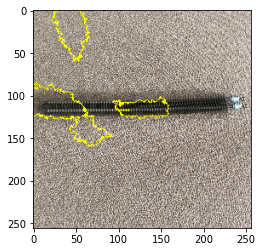

In [6]:
x_train = []
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        im = np.array(mpimg.imread(directory+"/"+str(filename)))
        x_train.append(im)
for i in tqdm(range(3)):

    explainer = lime_image.LimeImageExplainer(random_state=42)
    explanation = explainer.explain_instance(
             x_train[i],
             model.predict
    )
    plt.imshow(x_train[i])
    image, mask = explanation.get_image_and_mask(
             model.predict(
                  x_train[i].reshape((1,256,256,3))
             ).argmax(axis=1)[0],
             positive_only=True,
             hide_rest=False)
    print(model.predict(
                  x_train[i].reshape((1,256,256,3))
             ).argmax(axis=1)[0])

    plt.imshow(mark_boundaries(image, mask))